In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from os import listdir
import re

In [2]:
# get all file names
path = '2-hands'
files = [f for f in listdir(path) if f[-4:]=='.png']
# load one to get the dimensions
image = mpimg.imread(f'{path}/{files[0]}')
# get dimensions
shape = list(image.shape)
# remove alpha if necessary
if (shape[2]==4):
    shape[2] = 3
n = len(files)

In [3]:
y = np.zeros(shape=(n,2),dtype=int)
X = np.zeros(shape=(n,*shape))
for i in range(len(files)):
    # get the hour from the file name
    y[i,0] = re.search('^([0-9]*)_([0-9]*)',files[i])[1]
    y[i,1] = re.search('^([0-9]*)_([0-9]*)',files[i])[2]
    # get the pixels, remove the alpha if needed and convert to 0-255
    X[i] = (mpimg.imread(f'{path}/{files[i]}')[:,:,:shape[2]] )

In [4]:
# transform y to label encoded
temp = y.copy()
y = np.zeros(shape=(n,24),dtype=int)
for i in range(n):
    # hours, 0 to 11 for 1 to 12
    h = temp[i,0] -1
    # minutes 12 to 23 for 0 to 55
    m = temp[i,1]//5 + 12
    y[i,h] = 1
    y[i,m] = 1

7_50_clock_3901.png
7 50
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


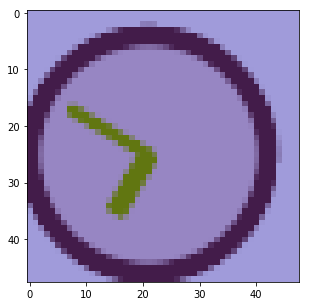

In [5]:
i = np.random.randint(0,n)
print(files[i])
print(temp[i,0],temp[i,1])
print(y[i])
plt.figure(figsize=(5,5))
plt.imshow(X[i])
plt.show()

In [6]:
p = 0.8
c = int(len(X) * p)

X_train = X[:c]
y_train = y[:c]

X_test = X[c:]
y_test = y[c:]

In [9]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

Using TensorFlow backend.


In [24]:
input_layer = Input(shape=shape)
conv1 = Convolution2D(24, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(12, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(64,activation='relu')(Flatten()(pool))
drop = Dropout(0.5)(hidden)
output1 = Dense(12, activation='softmax')(drop)
output2 = Dense(12, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=[output1, output2])
model.compile(optimizer='adam', loss=['categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy'], loss_weights=[1., 0.4])

In [37]:
model.fit(X_train, [y_train[:,:12],y_train[:,12:]],
          epochs=10,
          batch_size=10)

Epoch 1/10
8000/8000 [==============================] - 24s 3ms/step - loss: 0.6230 - dense_17_loss: 0.3553 - dense_18_loss: 0.6694 - dense_17_acc: 0.8614 - dense_18_acc: 0.7273
Epoch 2/10
8000/8000 [==============================] - 24s 3ms/step - loss: 0.6202 - dense_17_loss: 0.3496 - dense_18_loss: 0.6767 - dense_17_acc: 0.8624 - dense_18_acc: 0.7283
Epoch 3/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.5788 - dense_17_loss: 0.3207 - dense_18_loss: 0.6453 - dense_17_acc: 0.8754 - dense_18_acc: 0.7456
Epoch 4/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.5579 - dense_17_loss: 0.3144 - dense_18_loss: 0.6087 - dense_17_acc: 0.8797 - dense_18_acc: 0.7547
Epoch 5/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.5465 - dense_17_loss: 0.3016 - dense_18_loss: 0.6123 - dense_17_acc: 0.8812 - dense_18_acc: 0.7556
Epoch 6/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.5469 - dense_17_loss: 0.3058 - 

In [38]:
model.evaluate(X_test, [y_test[:,:12],y_test[:,12:]], batch_size=10)

2000/2000 [==============================] - 2s 978us/step


[0.3483035398926586,
 0.2300231918861391,
 0.29570086546242236,
 0.9289999932050705,
 0.8974999931454658]

In [40]:
model.save('060319.h5')

In [39]:
# 24, 12, 64, 10+25 epochs, 25+10 batch 1:0.4
[0.9289999932050705,0.8974999931454658]

[0.9289999932050705, 0.8974999931454658]

In [34]:
# 24, 12, 64, 10+5 epochs, 25+10 batch 1:0.4
[0.874999994635582, 0.8309999965131283]

[0.874999994635582, 0.8309999965131283]

In [30]:
# 24, 12, 64, 10 epochs, 25 batch 1:0.4
[0.7955000005662441, 0.7635000020265579]

[0.7955000005662441, 0.7635000020265579]

In [19]:
# 24, 12, 128, 10 epochs, 25 batch 1:0.8
[0.6375000055879354,0.8559999965131283]

[0.6375000055879354, 0.8559999965131283]

In [18]:
# 64, 32, 256, 10 epochs, 25 batch 1:0.8
[0.6135000016540288, 0.7960000015795231]

[0.6135000016540288, 0.7960000015795231]

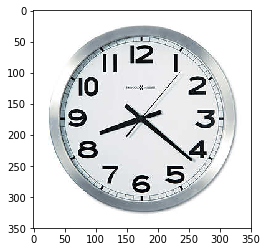

In [101]:
test1 = mpimg.imread('test/imageService.jpeg')

plt.imshow(test1)
plt.show()

In [106]:
small_test = test1[8:-8:7,8:-8:7]
small_test = small_test.reshape((1,*small_test.shape)).astype(float)
small_test/=255

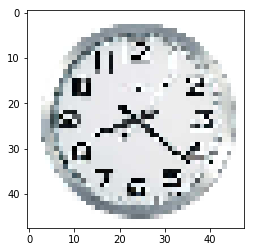

In [107]:
plt.imshow(small_test[0])
plt.show()

In [109]:
np.round(model.predict(small_test),3)

array([[[0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.   ]],

       [[0.935, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   , 0.   , 0.065]]], dtype=float32)

In [110]:
# 6:00
# not quite

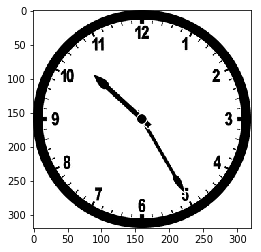

In [111]:
test2 = mpimg.imread('test/nclock-10-25_34219_sm.gif')
plt.imshow(test2,cmap='gray')
plt.show()

In [112]:
reshaped = np.ones((1,48,48,3)) * 255
reshaped[0,1:-1,1:-1,0] = test2[::7,::7]
reshaped[0,1:-1,1:-1,1] = test2[::7,::7]
reshaped[0,1:-1,1:-1,2] = test2[::7,::7]
reshaped/=255

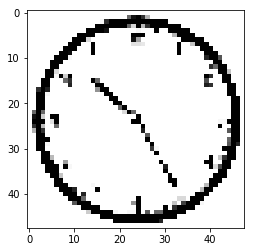

In [113]:
plt.imshow(reshaped[0])
plt.show()

In [114]:
np.round(model.predict(reshaped),3)

array([[[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]], dtype=float32)

In [115]:
# 7:25
# only minutes are correct

9800
5_15_clock_9800.png
5 15
[0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0]


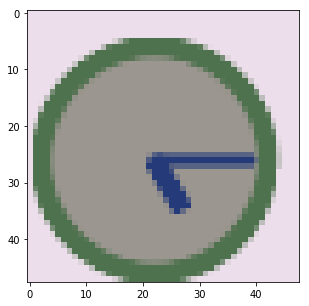

In [122]:
i = 9800
print(i)
print(files[i])
print(temp[i,0],temp[i,1])
print(y[i][:12])
print(y[i][12:])
plt.figure(figsize=(5,5))
plt.imshow(X[i])
plt.show()

In [127]:
np.round(model.predict(X[9800:9801]),1).astype(int)

array([[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]])